### 1)
Create widest possible separating 'road' between classes.
Soft margin looks for a good compromise between margin size and class separation.
### 2)
The instances located on or within the margins, as these determine the decision boundary.
### 3)
It will improve margin size, and possible not neglect smaller features.
### 4)
Nope, but distance from boundary can be used as scores
### 5)
Primal and linear, it will scale linearly with training instances as opposed to somewhere between m^2 and m^3 for dual
### 6)
Increase gamma and/or c
### 7)
See relevant section in book
### 8)

In [44]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier


iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

lin_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(loss="hinge", C=1, random_state=42))
])
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svm", SVC(kernel="linear", C=1, random_state=42))
])
sgd_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_sgd", SGDClassifier(loss="hinge", alpha=1.2 / (1 * len(X)), random_state=42))
])

In [45]:
lin_clf.fit(X[(y == 0) | (y == 2)], y[(y == 0) | (y == 2)])
svm_clf.fit(X[(y == 0) | (y == 2)], y[(y == 0) | (y == 2)])
sgd_clf.fit(X[(y == 0) | (y == 2)], y[(y == 0) | (y == 2)])

C:\Users\Kalvyn Roux\Anaconda3\envs\ada_env\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_sgd', SGDClassifier(alpha=0.008, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [46]:
print("lin_svc", lin_clf.named_steps['linear_svc'].intercept_, lin_clf.named_steps['linear_svc'].coef_);
print("svm", svm_clf.named_steps['linear_svm'].intercept_, svm_clf.named_steps['linear_svm'].coef_);
print("sgd", sgd_clf.named_steps['linear_sgd'].intercept_, sgd_clf.named_steps['linear_sgd'].coef_);

lin_svc [0.16529317] [[0.80511826 0.73082609]]
svm [0.1692673] [[0.82189265 0.71144771]]
sgd [0.16166077] [[1.04922243 0.95103416]]


In [47]:
w1 = -lin_clf.named_steps['linear_svc'].coef_[0, 0]/lin_clf.named_steps['linear_svc'].coef_[0, 1]
b1 = -lin_clf.named_steps['linear_svc'].intercept_[0]/lin_clf.named_steps['linear_svc'].coef_[0, 1]
w2 = -svm_clf.named_steps['linear_svm'].coef_[0, 0]/svm_clf.named_steps['linear_svm'].coef_[0, 1]
b2 = -svm_clf.named_steps['linear_svm'].intercept_[0]/svm_clf.named_steps['linear_svm'].coef_[0, 1]
w3 = -sgd_clf.named_steps['linear_sgd'].coef_[0, 0]/sgd_clf.named_steps['linear_sgd'].coef_[0, 1]
b3 = -sgd_clf.named_steps['linear_sgd'].intercept_[0]/sgd_clf.named_steps['linear_sgd'].coef_[0, 1]

In [48]:
line1 = lin_clf.named_steps['scaler'].inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = svm_clf.named_steps['scaler'].inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = sgd_clf.named_steps['scaler'].inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

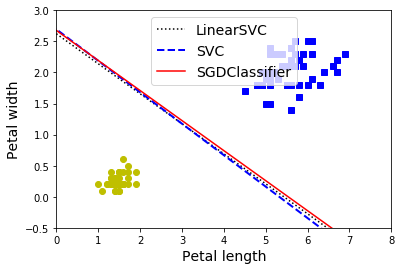

In [49]:
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 8, -0.5, 3])
plt.show()

### 9)